### Import required libraries
- Import `all analysis functions` module from `scripts`.
- Import `sqlite3` for database interaction.
- Import `warnings` and disable warnings.
- Import `pandas` for data manipulation.

In [1]:
from scripts.analysis import *
import sqlite3
import warnings
import pandas as pd

warnings.filterwarnings("ignore")

# Analysis and Explanation of Plots

In [2]:
conn = sqlite3.connect('../data/database.db')
df_egy = pd.read_sql('SELECT * FROM EGYPT', conn)

In [3]:
df_egy.head()

,index,title,date,num_of_vacancies,remote,company_name,city,type,industry_,company_size,min_num_of_years,max_num_of_years,gender,job_level
0,0,Zoho Support Specialist,2025-04-01,1,On-site,Pinerium,الإسكندرية,Unknown,خدمات الدعم التجاري الأخرى,Unknown,Unknown,Unknown,No Preference,No Preference
1,1,Zoho Project Manager,2025-04-02,1,On-site,Pinerium,الإسكندرية,Management,خدمات الدعم التجاري الأخرى,Unknown,Unknown,Unknown,No Preference,Management
2,2,Zoho Product Owner,2025-04-02,1,On-site,Pinerium,الإسكندرية,Unknown,خدمات الدعم التجاري الأخرى,Unknown,Unknown,Unknown,No Preference,No Preference
3,3,Zoho Implementation Specialist,2025-04-02,1,On-site,Pinerium,الإسكندرية,Unknown,خدمات الدعم التجاري الأخرى,Unknown,Unknown,Unknown,No Preference,No Preference
4,4,Zoho Developer,2025-04-02,1,On-site,Pinerium,الإسكندرية,Unknown,خدمات الدعم التجاري الأخرى,Unknown,Unknown,Unknown,No Preference,No Preference


In [4]:
df_egy['title'].nunique()

2025

In [5]:
df_egy['city'].unique()

array(['الإسكندرية', 'القاهرة', 'Unknown', 'العلمين الجديدة', 'طنطا',
       'شرم الشيخ', 'أبو كبير', 'دمياط', 'الفيوم', 'أسوان', 'الأقصر',
       'الجونة', 'بورسعيد', 'قليوب', 'منية النصر', 'المنوفية', 'الجيزة',
       'أجا', 'الإسماعيلية\u200e', 'المنصورة', 'السويس', 'منوف',
       'بني سويف'], dtype=object)

In [6]:
df_egy['city'].value_counts().head()

city
القاهرة            2172
Unknown            1604
الإسكندرية           99
العلمين الجديدة      38
شرم الشيخ            33
Name: count, dtype: int64

In [7]:
df_egy['title'].value_counts().head()

title
Accountant          83
Business Analyst    65
Account Manager     62
Support Engineer    41
Graphic Design      38
Name: count, dtype: int64

### **Plot 1: Top 10 Cities by Number of Jobs**
#### **Description**
- This bar chart shows the top 10 cities in Egypt based on the number of jobs available.
- The x-axis represents the names of the cities, while the y-axis represents the number of jobs.
- The cities are listed from left to right in descending order of job availability.
#### **Key Observations**
1. **Cairo** has the highest number of jobs, with over 2,000 jobs, making it the dominant city.
2. **Alexandria** follows as the second city with approximately 100 jobs.
3. Other cities such as **New Cairo**, **Sharm El-Sheikh**, **Matrouh**, **Aswan**, **Luxor**, **Giza**, and **Suez** have very low job availability, with most having fewer than 50 jobs.
#### **Meaning**
- Cairo is the capital and largest city in Egypt, serving as the country's political, economic, and cultural center, which explains its high job availability.
- Alexandria, as the second-largest city, offers some job opportunities but is far behind Cairo.
- Smaller cities like Sharm El-Sheikh, Matrouh, and Aswan have minimal job opportunities, likely due to their smaller populations and more specialized economies (e.g., tourism).

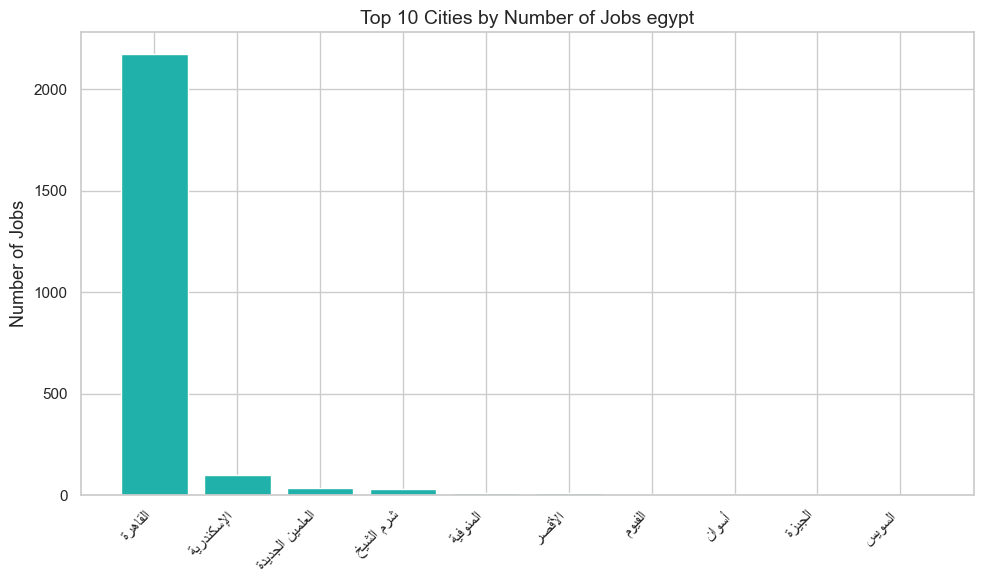

In [8]:
fig1 = job_distribution_by_city(df_egy[df_egy['city'] != 'Unknown'],
                                plot_name="job_distribution_by_city_egypt", folder='egypt', top_n=10)

### **Plot 2: Number of Jobs by Company**
#### **Description**
- This bar chart shows the number of jobs offered by different companies in Egypt.
- The x-axis represents the names of the companies, while the y-axis represents the number of jobs.
- The companies are listed from left to right in descending order of job availability.
#### **Key Observations**
1. **Talent 360** has the highest number of jobs, with over 290 jobs, making it the dominant employer.
2. **SSC - Egypt** follows as the second company with approximately 180 jobs.
3. **Vodafone - Egypt**, **Giza Systems**, and **Orange - Other locations** have moderate numbers of jobs, ranging from 100 to 120.
4. Other companies such as **Raya Holding for Financial Investments**, **swatX Solutions**, and **ProjectGrowth** offer around 50 to 100 jobs.
5. Smaller companies like **RAWAJ**, **Delivery Hero SE**, **ElsewedyElectric**, and **Tagaddod** have relatively low job availability, with most having fewer than 50 jobs.
#### **Meaning**
- **Talent 360** appears to be a major player in the Egyptian job market, possibly due to its focus on recruitment or staffing services.
- Companies like **SSC - Egypt** and **Vodafone - Egypt** are significant employers, reflecting the importance of technology and telecommunications in Egypt's economy.
- The presence of international brands (e.g., Vodafone) and local companies (e.g., Giza Systems) highlights a diverse job market.
- Smaller companies have limited job offerings, indicating a fragmented job landscape outside the top employers.

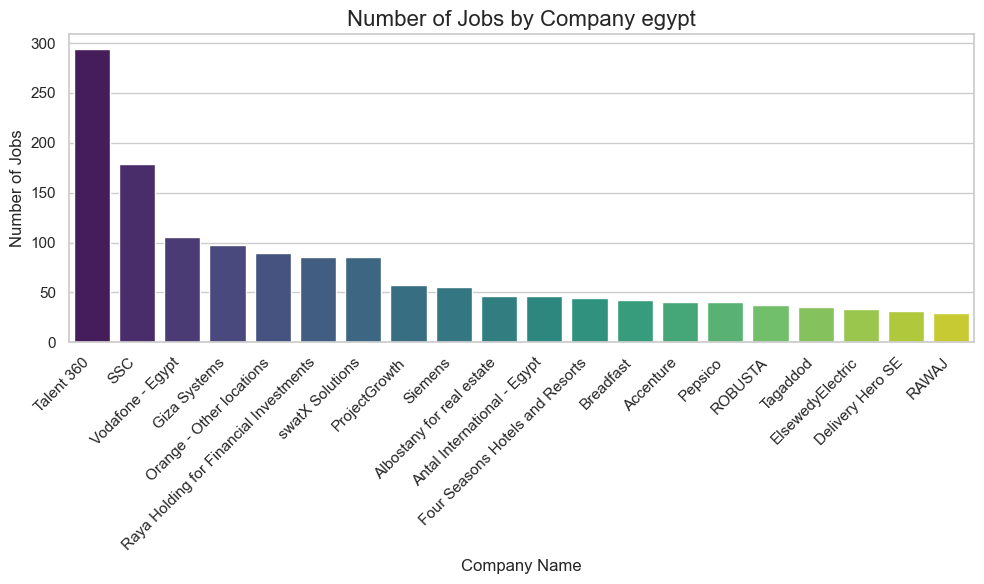

In [9]:
fig2 = analyze_jobs_by_company(df_egy, plot_name="analyze_jobs_by_company_egypt", folder='egypt')

### **Plot 3: Top 10 Most Frequent Job Titles**
#### **Description**
- This horizontal bar chart shows the top 10 most frequent job titles in Egypt based on the number of occurrences.
- The y-axis represents the job titles, while the x-axis represents the number of occurrences.
- The job titles are listed from top to bottom in descending order of frequency.
#### **Key Observations**
1. **Accountant** is the most frequent job title, with over 80 occurrences.
2. **Business Analyst** follows closely with approximately 65 occurrences.
3. **Account Manager** is the third most frequent job title, with around 60 occurrences.
4. **Support Engineer** and **Graphic Design** have moderate frequencies, with around 40 and 38 occurrences, respectively.
5. Other job titles such as **Software Engineer**, **Customer Service**, **Sales Manager**, **Product Manager**, and **Marketing Manager** have relatively lower frequencies, ranging from 27 to 35 occurrences.
#### **Meaning**
- **Accounting roles** (e.g., Accountant, Account Manager) are highly prevalent, indicating a strong demand for financial expertise in the Egyptian job market.
- **Business Analyst** and **Support Engineer** roles suggest a focus on data analysis and technical support, reflecting the growing importance of technology and analytics.
- The presence of graphic design and software engineering roles highlights the significance of creative and IT sectors in Egypt.
- Customer service and sales roles indicate a focus on client interaction and relationship management.

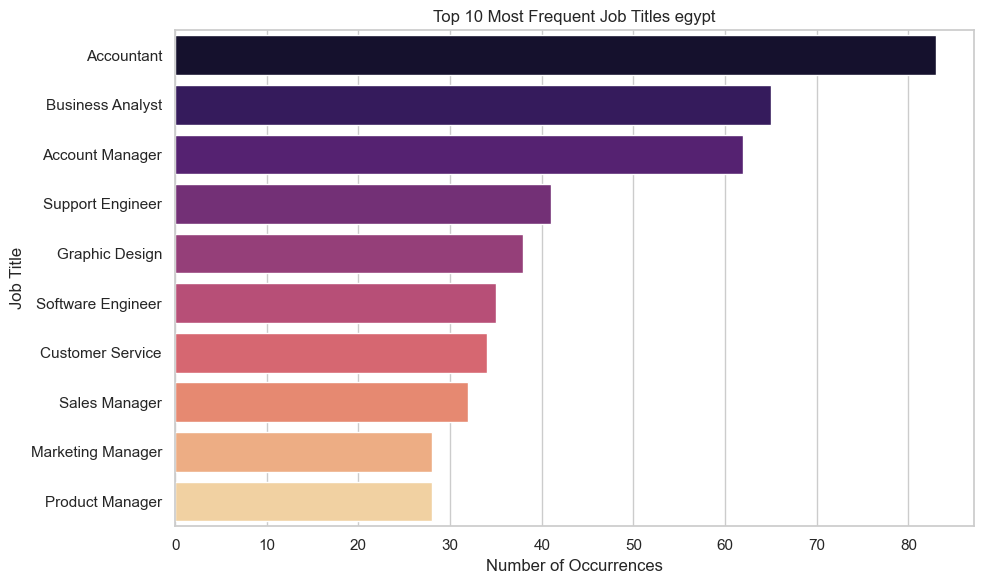

In [10]:
fig3 = get_top_job_titles_with_plot(df_egy, plot_name="get_top_job_titles_with_plot_egypt", folder='egypt')

### **Plot 4: Job Distribution by Work Type**
#### **Description**
- This pie chart shows the distribution of job types based on work arrangements in Egypt.
- The chart is divided into three segments:
  - **On-site**: Jobs that require physical presence at a workplace.
  - **Remote**: Jobs that can be performed entirely from a remote location.
  - **Hybrid**: Jobs that combine both on-site and remote work.
#### **Key Observations**
1. **On-site** jobs dominate the distribution, accounting for **86.5%** of the total jobs.
2. **Remote** jobs make up **9.9%** of the total jobs.
3. **Hybrid** jobs have the smallest share, representing only **3.6%** of the total jobs.
#### **Meaning**
- The overwhelming majority of jobs in Egypt are **on-site**, indicating that most employers prefer or require employees to work physically at a workplace.
- **Remote** jobs represent a small but notable portion of the job market, suggesting some flexibility in work arrangements but not as prevalent as on-site roles.
- **Hybrid** jobs are minimal, reflecting limited adoption of flexible work models that combine both on-site and remote work.

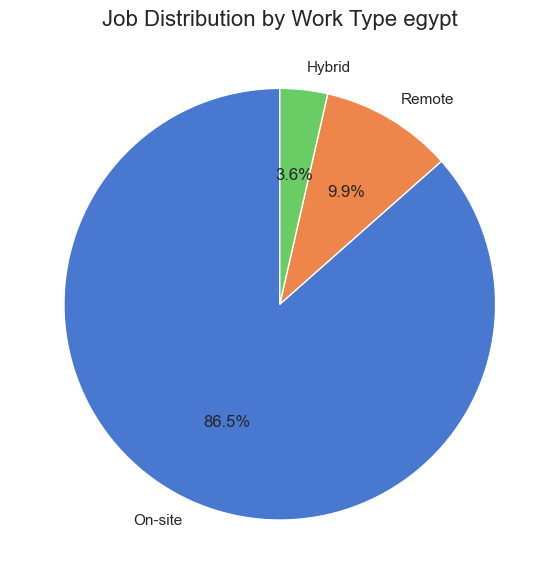

In [11]:
fig4 = analyze_jobs_by_work_type(df_egy, plot_name="analyze_jobs_by_work_type_egypt", folder='egypt')

### **Plot 5: Job Distribution by Gender**
#### **Description**
- This bar chart shows the job distribution based on gender in Egypt.
- The x-axis represents the gender categories: **No Preference**, **Female**, and **Male**.
- The y-axis represents the number of jobs.
#### **Key Observations**
1. **No Preference**:
   - Dominates the distribution with **3,815 jobs**, indicating that most job postings do not specify a gender preference.
2. **Female**:
   - Has a very small share with **130 jobs**.
3. **Male**:
   - Has an even smaller share with **64 jobs**.
#### **Meaning**
- The vast majority of job postings in Egypt are **gender-neutral** (No Preference), suggesting that employers are open to hiring candidates regardless of gender.
- The extremely low numbers for **Female** and **Male** indicate that gender-specific job postings are rare in Egypt.

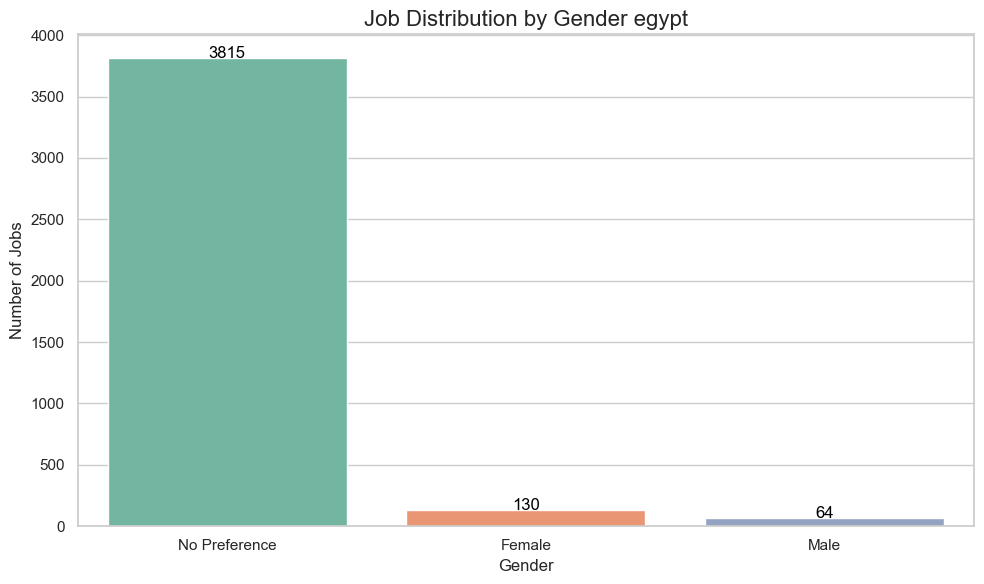

In [12]:
fig5 = analyze_jobs_by_gender(df_egy, plot_name="analyze_jobs_by_gender_egypt", folder='egypt')

### **Plot 6: Job Distribution by Job Level**
#### **Description**
- This bar chart shows the distribution of jobs based on job levels in Egypt.
- The x-axis represents the job levels: **Senior**, **Management**, **Junior**, **Senior Management**, **Graduate**, **Mid Level**, and **C-Suite**.
- The y-axis represents the number of jobs.
#### **Key Observations**
1. **Senior**:
   - Dominates the distribution with **843 jobs**, indicating that senior-level positions are the most prevalent.
2. **Management**:
   - Is the second most common job level with **679 jobs**.
3. **Junior**:
   - Has **79 jobs**, representing a moderate share.
4. **Senior Management**:
   - Has **67 jobs**, which is relatively low compared to other levels.
5. **Graduate**:
   - Has **52 jobs**, indicating a small but present share.
6. **Mid Level**:
   - Has **28 jobs**, showing a very low occurrence.
7. **C-Suite**:
   - Has only **4 jobs**, reflecting an extremely small presence.
#### **Meaning**
- The majority of job opportunities in Egypt are concentrated at the **Senior** and **Management** levels, suggesting a strong demand for experienced professionals and managers.
- Entry-level positions (**Junior**, **Graduate**) and higher executive roles (**C-Suite**) are less common, indicating a limited number of opportunities for both fresh graduates and top-tier executives.
- Mid-level positions (**Mid Level**) also have a low representation, highlighting a potential gap in mid-career opportunities.

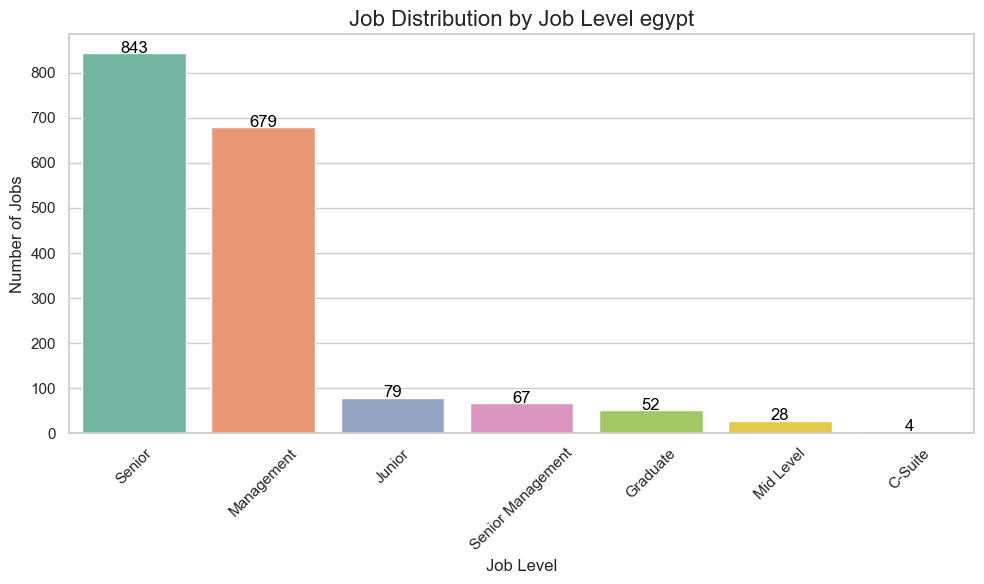

In [13]:
fig6 = analyze_jobs_by_job_level(df_egy[df_egy['job_level'] != 'No Preference'],
                                 plot_name="analyze_jobs_by_job_level_egypt",
                                 folder='egypt')

### **Plot 7: Number of Job Entries Over Time**
#### **Description**
- This line chart shows the trend in the number of job entries over time in Egypt.
- The x-axis represents the date, spanning from November 2025 to April 2025.
- The y-axis represents the number of job entries.
#### **Key Observations**
1. **Initial Phase (November 2025)**:
   - The number of job entries starts at a very low value, close to zero.
2. **Gradual Increase**:
   - From November to December 2025, there is a steady increase in job entries.
3. **Significant Growth**:
   - Between January and February 2025, the number of job entries grows more rapidly.
4. **Peak in March 2025**:
   - The highest number of job entries is observed in March 2025, reaching approximately **1,200 jobs**.
5. **Slight Decline in April 2025**:
   - There is a minor decline in April 2025, but the number of job entries remains high, around **1,200 jobs**.
#### **Meaning**
- The chart indicates a consistent upward trend in job entries over the six-month period, suggesting increasing job opportunities in Egypt.
- The rapid growth between January and March 2025 could be due to seasonal factors, economic improvements, or specific industry developments.
- The slight dip in April 2025 might indicate a temporary slowdown or stabilization after the peak.

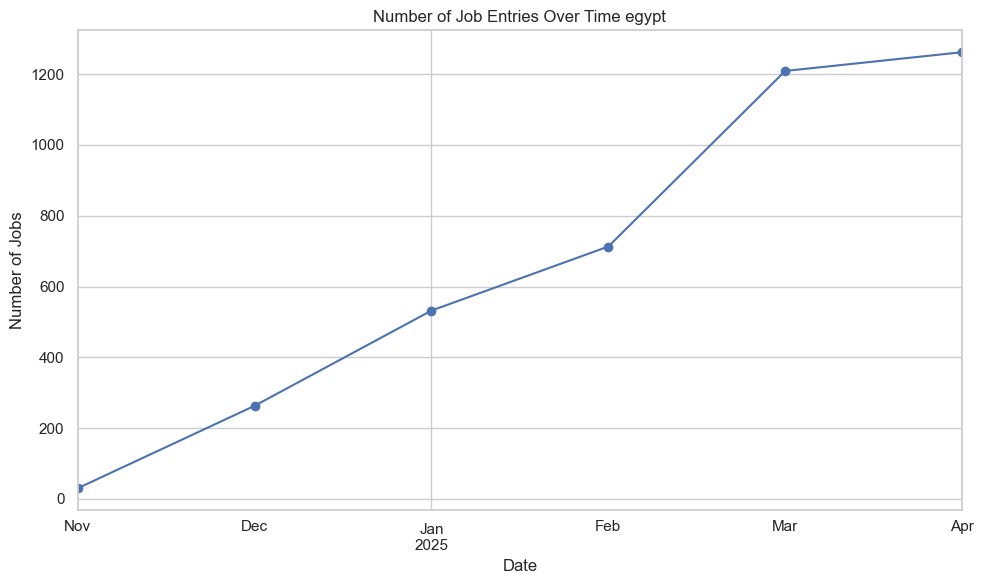

In [14]:
fig7 = plot_job_trend_over_time(df_egy, plot_name="plot_job_trend_over_time_egypt", folder='egypt')

### **Plot 8: The Highest 10 Areas Declared for Business Opportunities**
#### **Description**
- This bar chart shows the top 10 domains with the highest number of business opportunities in Egypt.
- The x-axis represents the domains, while the y-axis represents the number of jobs.
#### **Key Observations**
1. **خدمات الدعم التجاري الأخرى (Other Commercial Support Services)**:
   - Dominates the chart with **3,240 jobs**, indicating it is the most significant area for business opportunities.
2. **الاستشارات الهندسية العامة (General Engineering Consultancy)**:
   - Has **97 jobs**, making it the second-highest domain.
3. **الاستشارات الإدارية (Management Consultancy)**:
   - Follows with **85 jobs**.
4. **الاستعانة بالمصادر الخارجية المبيعات (Outsourcing Sales Resources)**:
   - Has **65 jobs**.
5. **التعليم العالي (Higher Education)**:
   - Shows **58 jobs**.
6. **الضيافة والسكن (Hospitality and Accommodation)**:
   - Also has **58 jobs**.
7. **التسوق (Retail)**:
   - Has **43 jobs**.
8. **Unknown**:
   - Shows **36 jobs**.
9. **البناء والتشييد (Construction)**:
   - Has **35 jobs**.
10. **البيع بالتجزئة وبالجملة (Wholesale and Retail Trade)**:
    - Has **30 jobs**.
#### **Meaning**
- **Other Commercial Support Services** is the leading domain, suggesting a strong demand for services that support commercial activities.
- **General Engineering Consultancy** and **Management Consultancy** also show significant activity, indicating a focus on professional services.
- Domains like **Higher Education**, **Hospitality and Accommodation**, and **Retail** have moderate job opportunities, reflecting their importance in the Egyptian economy.
- The presence of "Unknown" suggests some data may not be categorized, but even so, it indicates limited opportunities compared to other sectors.

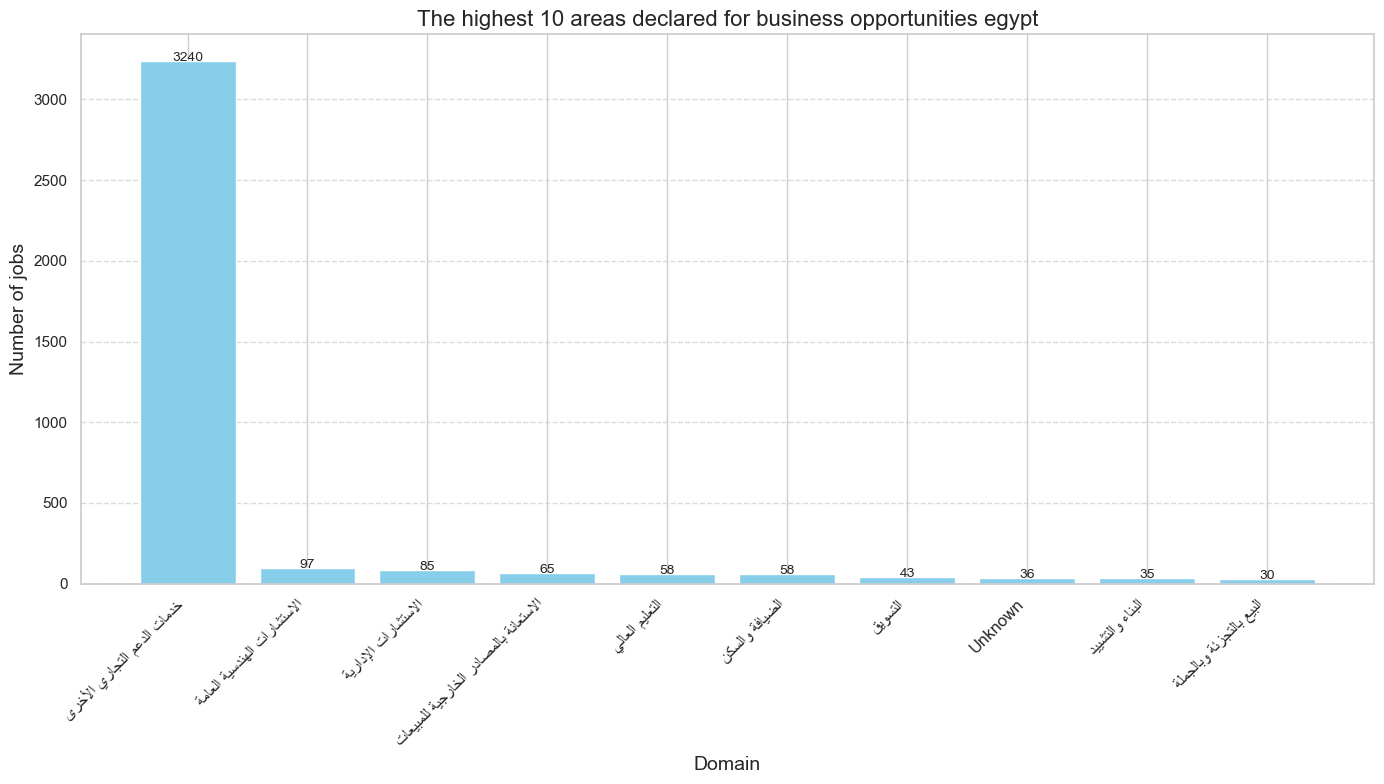

In [15]:
fig8 = plot_job_postings_by_industry(df_egy, plot_name="plot_job_postings_by_industry_egypt", folder='egypt')

### **Plot 9: Job Distribution by Type**
#### **Description**
- This pie chart shows the distribution of job types in Egypt.
- The chart is divided into several segments representing different job types:
  - **Unknown**: 76.48%
  - **Management**: 18.68%
  - **Full-Time**: 3.14%
  - **Intern**: 1.47%
  - **Part-Time**: 0.10%
  - **Contracts**: 0.10%
  - **Temporary**: 0.02%
#### **Key Observations**
1. **Unknown**:
   - Dominates the distribution with **76.48%**, indicating that a significant portion of job listings do not specify the job type.
2. **Management**:
   - Is the second-largest segment with **18.68%**, showing a notable presence of management roles.
3. **Full-Time**:
   - Represents **3.14%** of the jobs, indicating a moderate number of full-time positions.
4. **Intern**:
   - Accounts for **1.47%**, suggesting a small but present number of internship opportunities.
5. **Part-Time**, **Contracts**, and **Temporary**:
   - Have very low percentages (**0.10%, 0.10%, and 0.02%**, respectively), indicating minimal occurrences of these job types.
#### **Meaning**
- The overwhelming majority of job listings in Egypt are categorized as **Unknown**, which could imply incomplete data or a lack of detailed job type information.
- **Management** roles are the next most common, reflecting a strong demand for leadership and managerial positions.
- Full-time positions are moderately prevalent, while internships, part-time roles, contracts, and temporary jobs are relatively rare.

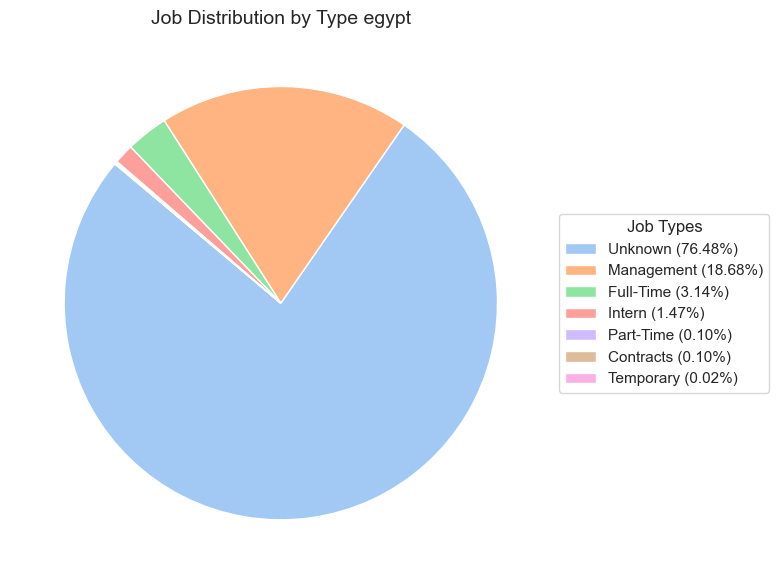

In [16]:
fig9 = analyze_job_type_distribution(df_egy, plot_name="analyze_job_type_distribution_egypt", folder='egypt')

### **Plot 10: Comparison of Min & Max Experience Requirements**
#### **Description**
- This box plot compares the minimum (`min_num_of_years`) and maximum (`max_num_of_years`) years of experience required for jobs in Egypt.
- The y-axis represents the number of years of experience.
- The x-axis has two categories: `min_num_of_years` and `max_num_of_years`.
#### **Key Observations**
1. **Minimum Years of Experience (`min_num_of_years`)**:
   - The median value is around **3 years**.
   - The interquartile range (IQR) spans from approximately **0 to 6 years**, indicating that most job postings require between 0 and 6 years of experience.
   - There are a few outliers with higher minimum requirements, reaching up to **10 years**.
2. **Maximum Years of Experience (`max_num_of_years`)**:
   - The median value is around **8 years**.
   - The IQR spans from approximately **5 to 15 years**, showing that most job postings have a maximum requirement between 5 and 15 years.
   - There are several outliers with very high maximum requirements, reaching up to **20 years**.
#### **Meaning**
- **Minimum Experience**:
  - Most job postings in Egypt do not require extensive experience, with a median of 3 years. However, there are some roles that demand more, such as those requiring 10 years or more.
- **Maximum Experience**:
  - The majority of job postings have a maximum experience requirement of around 8 years, but there is significant variability, with some roles accepting candidates with up to 20 years of experience.
  - The presence of outliers suggests that certain specialized or senior-level positions may have much higher experience requirements.

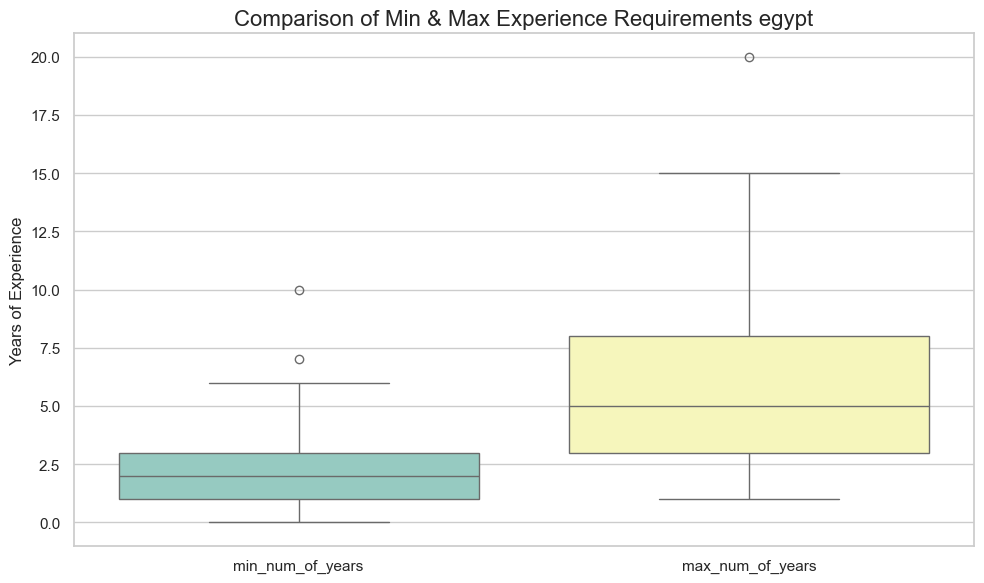

In [17]:
fig10 = compare_experience_requirements(df_egy, plot_name="compare_experience_requirements_egypt", folder='egypt')

### **Plot 11: Heatmap of Job Count by City and Job Level**
#### **Description**
- This heatmap shows the distribution of job counts across different cities in Egypt, categorized by job levels.
- The x-axis represents the job levels: **C-Suite**, **Graduate**, **Junior**, **Management**, **Mid Level**, **No Preference**, **Senior**, and **Senior Management**.
- The y-axis represents the cities in Egypt.
- The color intensity indicates the number of jobs, with darker shades representing higher job counts.
#### **Key Observations**
1. **Most Prominent Cities**:
   - **القاهرة (Cairo)** has the highest job counts across multiple job levels:
     - **No Preference**: 1,160 jobs.
     - **Mid Level**: 509 jobs.
     - **Management**: 377 jobs.
     - Other levels have moderate to low job counts.
   - **الإسكندرية (Alexandria)** also shows significant job counts:
     - **No Preference**: 62 jobs.
     - **Mid Level**: 21 jobs.
     - Other levels have minimal job counts.
2. **Job Levels with High Demand**:
   - **No Preference** consistently shows the highest job counts across most cities.
   - **Mid Level** and **Management** also have notable job counts in major cities like Cairo and Alexandria.
3. **Cities with Low Job Counts**:
   - Many smaller cities (e.g., أسوان, الجونة, السويس) have very low or zero job counts across all levels.
   - Only a few cities (e.g., القاهرة, الإسكندرية) contribute significantly to the job market.
#### **Meaning**
- **Cairo** is the dominant city in terms of job opportunities, offering a wide range of roles at various levels, particularly in **No Preference** and **Mid Level** positions.
- **Alexandria** is the second-largest contributor but with significantly fewer job opportunities compared to Cairo.
- Smaller cities have limited job availability, indicating that the majority of job opportunities are concentrated in major urban centers.
- The high count of **No Preference** jobs suggests that many employers are open to hiring candidates regardless of specific job level preferences.

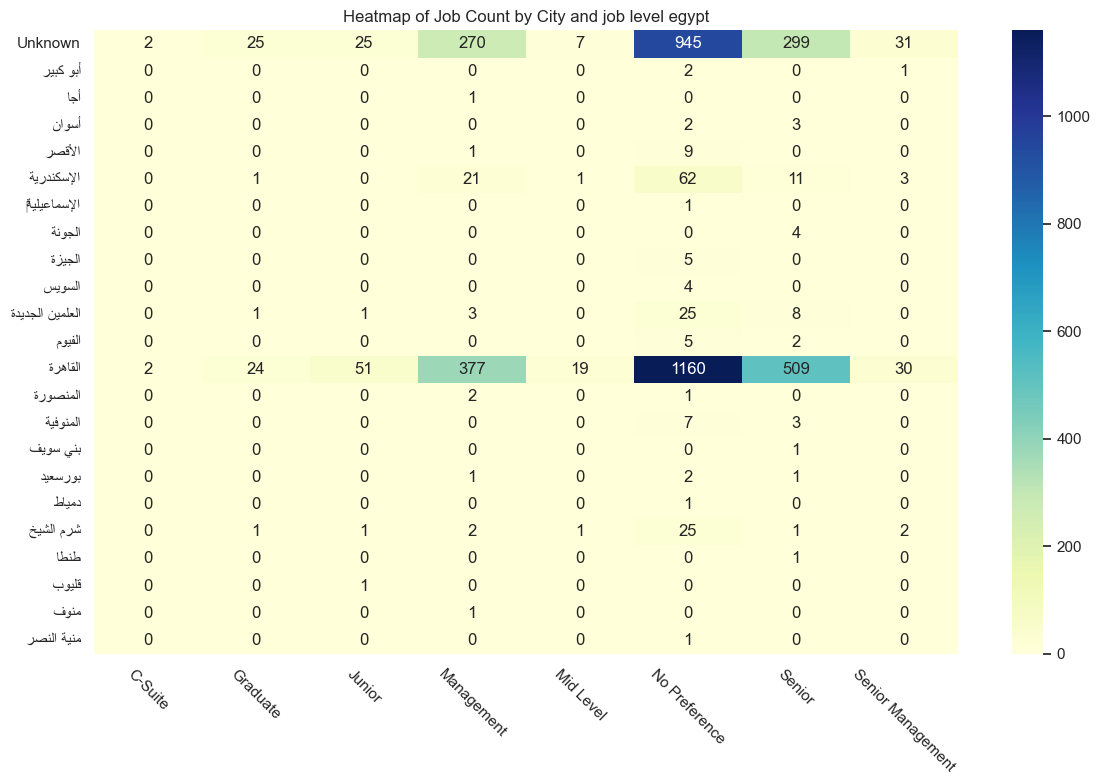

In [18]:
fig11 = jobs_heatmap_by_city_and_job_level(df_egy, plot_name="jobs_heatmap_by_city_and_job_level_egypt", folder='egypt')

### **Plot 12: Most Common Job Titles (Wordcloud)t**
#### **Description**
- This word cloud visualizes the most common job titles in Egypt.
- The size of each word represents its frequency in the dataset, with larger words indicating more frequent job titles.
- Words like **Account Manager**, **Manager**, **Senior**, **Lead**, **Specialist**, and **Accountant** are prominently displayed.
#### **Key Observations**
1. **Prominent Job Titles**:
   - **Account Manager**: One of the most frequently occurring job titles.
   - **Manager**: A very common role, reflecting a strong demand for managerial positions.
   - **Senior**, **Lead**, and **Specialist**: These terms indicate higher-level or specialized roles.
   - **Accountant**: Another prominent title, suggesting a significant demand for financial expertise.
2. **Other Common Roles**:
   - Words like **Engineer**, **Software**, **Project**, and **Sales** appear frequently, indicating roles in engineering, software development, project management, and sales.
   - Terms such as **Business Analyst**, **Support**, and **Coordinator** also appear, showing a mix of analytical, support, and coordination roles.
3. **Industry-Specific Roles**:
   - Words like **Data Analyst**, **Design Engineer**, and **Customer Service** suggest a diverse range of industries, including technology, engineering, and customer service.
#### **Meaning**
- The word cloud highlights a strong emphasis on **management** and **specialized roles** in Egypt, with a particular focus on **accounting** and **managerial positions**.
- The presence of technical roles (e.g., **Software Engineer**, **Project Manager**) indicates a growing demand for skills in technology and project management.
- The inclusion of **Sales** and **Customer Service** roles suggests a focus on client-facing and business development activities.

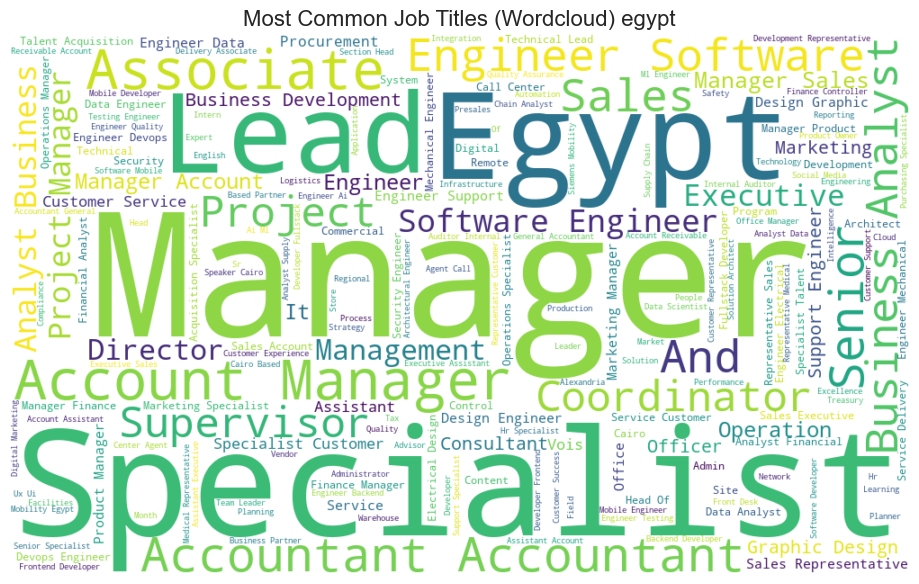

In [19]:
fig12 = plot_top_job_titles_wordcloud(df_egy, plot_name="plot_top_job_titles_wordcloud_egypt", folder='egypt')
